**Название проекта:**

Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

**Цель исследования:**

Поиск особенностей и зависимостей, которые существуют на рынке недвижимости
- исследование параметров объектов недвижимости таких как общая площадь, количество комнат, этажность, расстояние до центра или аэропорта и др.
- исследование зависимости между параметрами объекта и его конечной стоимостью

**Ход исследования**
1. Загрузка данных и подготовка их к анализу
- Обзор данных
- Предобработка данных

2. Исследовательский анализ данных
- Исследование параметров объектов
- Исследование количества дней продажи объекта недвижимости
- Исследование факторов, влияющих на полную стоимость квартиры

3. Вывод

**Описание проекта**

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

**Описание данных**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

# 1. Загрузка данных и подготовка их к анализу

## 1.1. Обзор данных

In [ ]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# откроем файл
df = pd.read_csv('/content/drive/MyDrive/ЯПрактикум - АЛЛА/Спринт 3. Исследовательский анализ данных/real_estate_data.csv', sep='\t')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

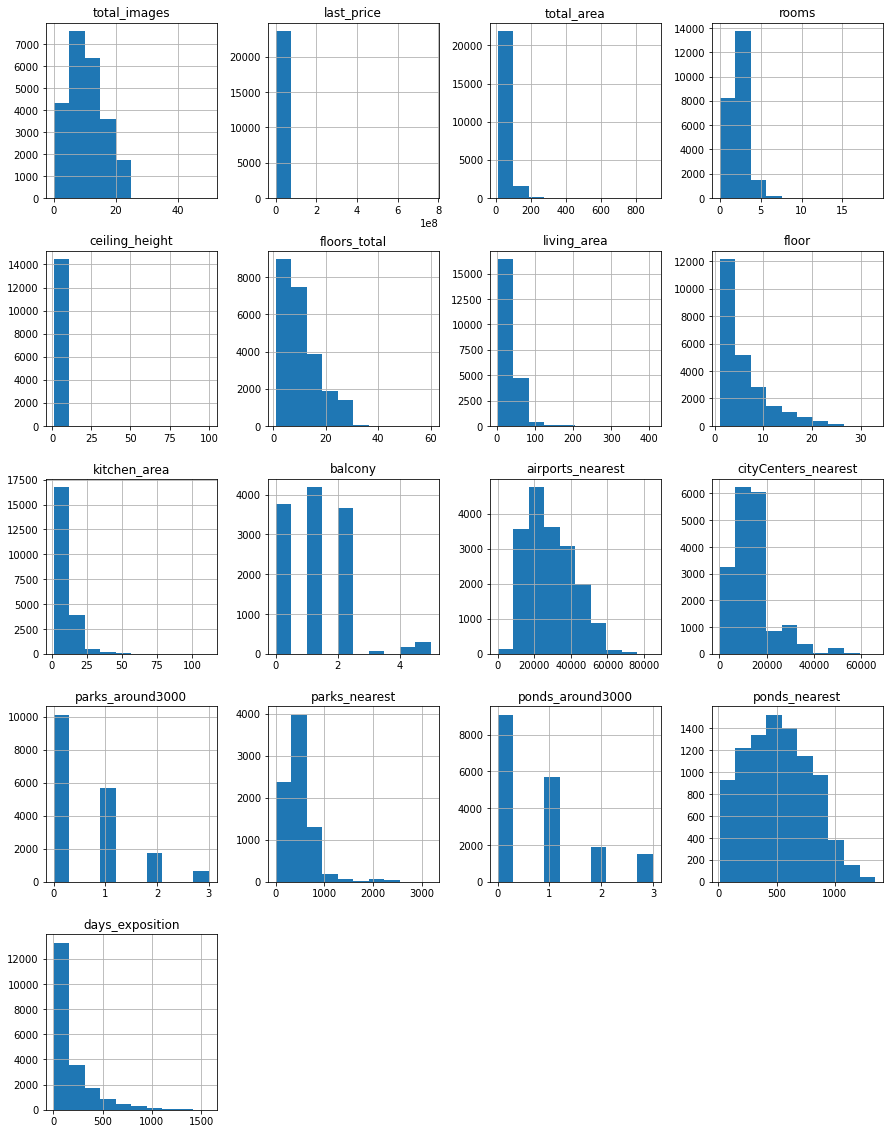

In [ ]:
# изучим информацию и построим гистограммы
df.info()
df.hist(figsize=(15, 20))
plt.show()

In [ ]:
# выведем на экран все столбцы
pd.options.display.max_columns = 100
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


## 1.2. Предобработка данных

In [ ]:
# определяем в каких столбцах есть пропуски 
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [ ]:
# определяем колличество пропусков в %
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [ ]:
# заменим пропуски в столбце balcony на 0.
df['balcony'] = df['balcony'].fillna(0)

In [ ]:
#  заменим пропуски в столбце locality_name на Без названия
df['locality_name'] = df['locality_name'].fillna('Без названия')

Пропуски в столбце parks_around3000 возможно означают, что парков в радиусе 3км нет.

In [ ]:
#  Заменим на заглушку 999999
df['parks_around3000'] = df['parks_around3000'].fillna(999999)

Пропуски в столбце ponds_around3000 возможно означают, что водоемов в радиусе 3км нет.

In [ ]:
# Заменим на заглушку 999999
df['ponds_around3000'] = df['ponds_around3000'].fillna(999999)

Пропуски в столбце is_apartment означают, что объект не является аппартаментами.

In [ ]:
# Заменим на пустую строку
df['is_apartment'] = df['is_apartment'].fillna(value='')

Пропуски в столбце days_exposition возможно означают, что квартира еще не продана и объявление активно. 

In [ ]:
# Заменим на заглушку 999999
df['days_exposition'] = df['days_exposition'].fillna(999999)

Пропуски в столбце floors_total составляют 0,4% от всего объема данных, не повлияют на анализ. 

In [ ]:
# Заменим на заглушку 999999
df['floors_total'] = df['floors_total'].fillna(999999)

In [ ]:
# пропуски в столбцах с расстоянием заменим на заглушку 999999
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(999999)

In [ ]:
# пропуски в столбцах с расстоянием заменим на заглушку 999999
df['parks_nearest'] = df['parks_nearest'].fillna(999999)

In [ ]:
# пропуски в столбцах с расстоянием заменим на заглушку 999999
df['airports_nearest'] = df['airports_nearest'].fillna(999999)

In [ ]:
# пропуски в столбцах с расстоянием заменим на заглушку 999999
df['ponds_nearest'] = df['ponds_nearest'].fillna(999999)

In [ ]:
# пропуски в столбце ceiling_height заменим на медианное значение
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [ ]:
# пропуски в столбце living_area заменим на медианное значение
df['living_area'] = df['living_area'].fillna(df['living_area'].median())

In [ ]:
# пропуски в столбце kitchen_area заменим на медианное значение
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())

In [ ]:
# проверим еще раз пропуски
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

Пропуски во всех столбцах можно разделить на условные 3 группы
- столбцы с пропусками заменяем на пустые строки, т.к. пропуски составляют менее 1% либо пропуски означают отсутствие утверждения (возможно парков/водоемов в радиусе 3км нет или объект недвижимости не является аппартаментами)
- столбцы с пропусками заменяем на заглушки, т.к. можно предположить, что от некоторых населённых пунктов аэропорты/ парки/ водоемы очень далеко, и сервис просто не проставляет расстояние
- столбцы с пропусками в данных о высоте/расстоянии заменяем на медианное значение, чтобы исключить "выбросы"

In [ ]:
# заменим тип данных в столбце first_day_exposition на формат datetime
df['first_day_exposition'] = df['first_day_exposition'].astype('datetime64')

In [ ]:
# заменим тип данных в столбце is_apartment на булево значение
df['is_apartment'] = df['is_apartment'].astype('bool')

In [ ]:
# замeним тип данных в столбцах balcony, floors_total, parks_around3000, ponds_around3000, days_exposition
df['balcony'] = df['balcony'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['days_exposition'] = df['days_exposition'].astype('int')

In [ ]:
# проверим типы данных в исправленных столбцах
df.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 int64
parks_nearest                  float64
ponds_around3000                 int64
ponds_nearest                  float64
days_exposition                  int64
dtype: object

In [ ]:
# проверим количество строк-дубликатов в данных
df.duplicated().sum()

0

In [ ]:
# выведем перечень уникальных значений в названиях населенных пунктов
df['locality_name'].sort_values(ascending=False).unique()

array(['село Шум', 'село Старая Ладога', 'село Русско-Высоцкое',
       'село Рождествено', 'село Путилово', 'село Паша', 'село Павлово',
       'село Никольское', 'село Копорье', 'садовое товарищество Садко',
       'садовое товарищество Рахья', 'садовое товарищество Приладожский',
       'садовое товарищество Новая Ропша',
       'садоводческое некоммерческое товарищество Лесная Поляна',
       'посёлок станции Свирь', 'посёлок станции Громово',
       'посёлок при железнодорожной станции Приветнинское',
       'посёлок при железнодорожной станции Вещево',
       'посёлок городского типа имени Свердлова',
       'посёлок городского типа имени Морозова',
       'посёлок городского типа Форносово',
       'посёлок городского типа Ульяновка',
       'посёлок городского типа Токсово', 'посёлок городского типа Тайцы',
       'посёлок городского типа Сиверский',
       'посёлок городского типа Рябово', 'посёлок городского типа Рощино',
       'посёлок городского типа Павлово', 'посёлок гор

In [ ]:
# заменим неявные дубликаты
replace_values = {'ё':'е'}
df = df.replace({'locality_name': replace_values})
df['locality_name'] = df['locality_name'].replace(['ё'],['е'],regex=True)

In [ ]:
# заменим неявные дубликаты
word_list = ['поселок городского типа', 'поселок Мурино', 'деревня Кудрово', 'Коммунары',\
             'поселок Рябово' ,'поселок станции Вещево','поселок станции Приветнинское',\
             'коттеджный поселок Лесное', 'поселок при железнодорожной станции',\
            'садоводческое некоммерческое товарищество']
name = ['городской посёлок', 'Мурино', 'Кудрово', 'Коммунар', 'поселок городского типа Рябово',\
        'поселок при железнодорожной станции Вещево',\
        'поселок при железнодорожной станции Приветнинское', 'поселок Лесное', 'поселок станции',\
       'садовое товарищество']
 
for word in word_list:
    df['locality_name'] = df['locality_name'].replace(word_list, name, regex=True)

In [ ]:
# проверим столбец ceiling_height на наличие аномалий
df['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [ ]:
# исправим ошибки в данных в столбце ceiling_height
df['ceiling_height'] = df['ceiling_height'].replace({
    25.0: 2.5,
    27.0: 2.7,
    32.0: 3.2,
    24.0: 2.4,
    26.0: 2.6,
    14.0: 1.4,
    20.0: 2.0,
    27.5: 2.75,
    22.6: 2.26,
    10.3: 1.03
})

In [ ]:
# получим список характерных значений методом describe()
df['ceiling_height'].describe()

count    23699.000000
mean         2.701595
std          0.673591
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [ ]:
# найдем недвижимость с самыми большими значениями в столбце ceiling_height
df.sort_values(by='ceiling_height', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5,14.0,5,True,False,False,11.0,5,Санкт-Петербург,34963.0,8283.0,1,223.0,3,30.0,19
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16,19.3,14,False,False,False,8.3,1,Санкт-Петербург,13069.0,10763.0,0,999999.0,1,613.0,14
17442,0,5350000.0,54.0,2015-06-16,2,8.0,5,29.0,2,False,False,False,9.1,1,Красное Село,24638.0,28062.0,0,999999.0,0,999999.0,469
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5,15.3,2,False,False,False,7.3,0,деревня Нурма,999999.0,999999.0,999999,999999.0,999999,999999.0,125
15743,14,5600000.0,67.0,2016-11-11,3,8.0,16,41.0,1,False,False,False,8.0,0,Санкт-Петербург,32691.0,11035.0,1,723.0,0,999999.0,474
20264,17,119000000.0,187.6,2017-07-10,4,6.0,7,147.0,7,False,False,False,15.6,0,Санкт-Петербург,26902.0,5605.0,3,484.0,1,305.0,259
21227,0,8200000.0,71.0,2017-07-21,0,5.8,5,68.0,5,False,True,False,9.1,0,Санкт-Петербург,20170.0,1261.0,2,295.0,3,366.0,30
1388,20,59800000.0,399.0,2015-01-21,5,5.6,6,30.0,6,False,False,False,9.1,0,Санкт-Петербург,26204.0,6934.0,2,149.0,2,577.0,719
7578,17,38000000.0,143.0,2017-11-02,3,5.5,5,83.0,5,False,False,False,29.0,1,Санкт-Петербург,26333.0,6448.0,3,479.0,0,999999.0,999999
1026,20,155000000.0,310.0,2018-10-12,5,5.3,3,190.0,3,False,False,False,63.0,2,Санкт-Петербург,24899.0,4785.0,0,999999.0,1,603.0,999999


Среднее практически на уровне медианы, значит в распределении практически не осталось аномальных значений.
Выявлен один объект недвижимости с нетипично высоким потолком в 100м, признаем его выбросом и удалим.

In [ ]:
df= df.query('index not in [22869]')

In [ ]:
# добавим в таблицу стоимость за 1кв. метр
df['price_one_area'] = df['last_price']/df['total_area']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# добавим в таблицу день недели, месяц и год публикации объявления
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].astype('datetime64[M]')
df['year'] = df['first_day_exposition'].dt.year

In [ ]:
# добавим в таблицу тип этажа квартиры (значения — «первый», «последний», «другой»)
def floor_option(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
df['floor_type'] = df.apply(floor_option, axis=1)

In [ ]:
# найдем расстояние до центра города в километрах
df['cityCenters_nearest'] = (df['cityCenters_nearest']/1000).astype('int')

В данном разделе мы:

- нашли пропуски и обработали их 
- изменили типы данных, где необходимо
- проверили датасет на дубликаты
- нашли и заменили неявные дубликаты
- нашли и исправили аномальные значаения в столбце ceiling_height
- добавили дополнительные столбцы со стоимостью недвижимости за 1кв.м.; отдельно день/месяц/год публикации объявления; типы этажей, на которых расположена недвижимость; расстояние до центра города в км.

# 2. Исследовательский анализ данных

## 2.1. Исследование параметров объектов

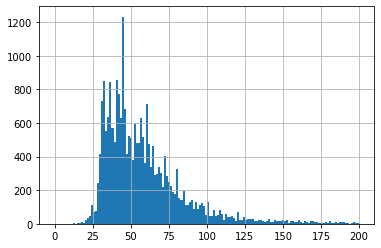

In [ ]:
# построим гистограмму для столбца total_area 
df['total_area'].max()
df['total_area'].hist(bins=150, range=(0,200));

по данным из столбца total_area видим, что преобладают объекты с общей площадью до 60кв.м

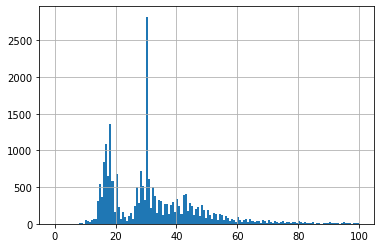

In [ ]:
# построим гистограмму для столбца living_area 
df['living_area'].max()
df['living_area'].hist(bins=150, range=(0,100));

по данным из столбца living_area видим, что преобладают объекты с жилой площадью до 30кв.м

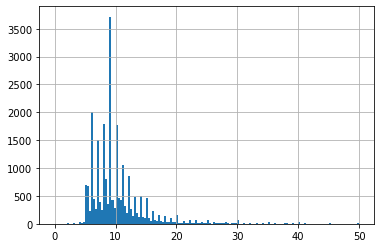

In [ ]:
# построим гистограмму для столбца kitchen_area 
df['kitchen_area'].max()
df['kitchen_area'].hist(bins=150, range=(0,50));

по данным из столбца kitchen_area видим, что преобладают объекты недвижимости с площадью кухни до 10кв.м

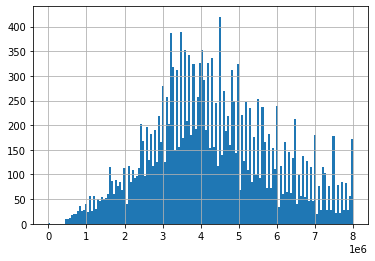

In [ ]:
# построим гистограмму для столбца last_price 
df['last_price'].max()
df['last_price'].hist(bins=150, range=(0,8000000));

по данным из столбца last_price видим, что преобладают объекты недвижимости с общей стоимостью до 4,5 млн.

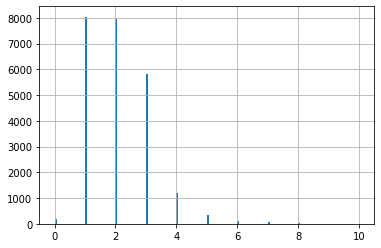

In [ ]:
# построим гистограмму для столбца rooms 
df['rooms'].max()
df['rooms'].hist(bins=150, range=(0,10));

по данным из столбца rooms видим, что 34% продаваемых объектов имеют одну комнату, 34% имеют две комнаты, 25% - три комнаты.

count    23698.000000
mean         2.697490
std          0.232866
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

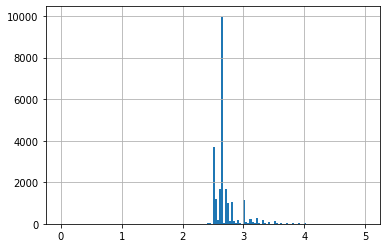

In [ ]:
# построим гистограмму для столбца ceiling_height
df['ceiling_height'].max()
df['ceiling_height'].hist(bins=150, range=(0,5));
df['ceiling_height'].describe()

по данным из столбца ceiling_height видим, что почти половина продаваемых объектов имеют среднюю высоту потолков 2,65м

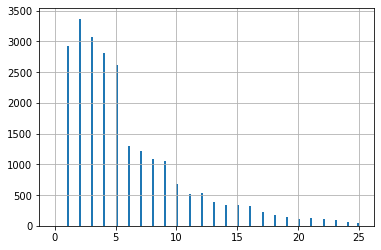

In [ ]:
# построим гистограмму для столбца floor
df['floor'].max()
df['floor'].hist(bins=150, range=(0,25));

In [ ]:
# проведем сортировку для столбца floor
df['floor'].value_counts()

2     3368
3     3073
1     2917
4     2804
5     2620
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
30       1
29       1
32       1
33       1
31       1
Name: floor, dtype: int64

по данным из столбца floor видим, что 82% объектов недвижимости расположены до 10 этажа

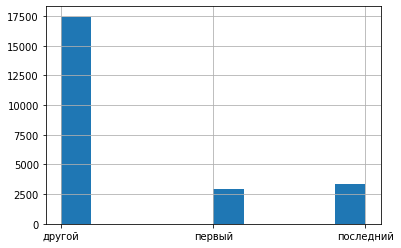

In [ ]:
# построим гистограмму для столбца floor_type
df['floor_type'].hist(bins=10);

по данным из столбца floor_type видим, что большая часть объектов недвижимости расположены не на 1 этаже (12%) и не на последнем (14%) этажах.

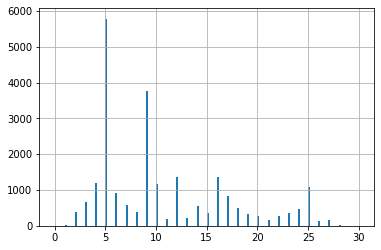

In [ ]:
# построим гистограмму для столбца floors_total
df['floors_total'].max()
df['floors_total'].hist(bins=150, range=(0,30));

по данным из столбца floors_total видим, что большая часть объектов недвижимости расположены на 5 и 9 этажах, 40% от всей базы данных.

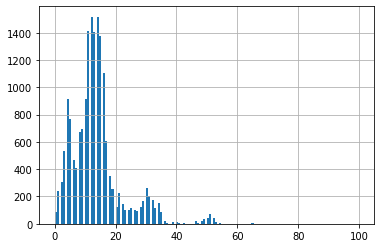

In [ ]:
# построим гистограмму для столбца cityCenters_nearest
df['cityCenters_nearest'].max()
df['cityCenters_nearest'].hist(bins=150, range=(0,100));

по данным из столбца cityCenters_nearest видим, что большая часть объектов недвижимости расположены в центре города

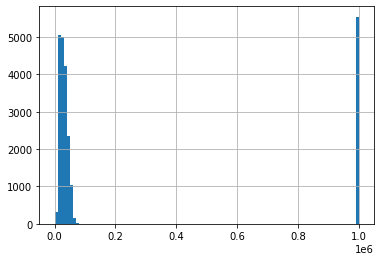

In [ ]:
# построим гистограмму для столбца airports_nearest
df['airports_nearest'].max()
df['airports_nearest'].hist(bins=100);

по данным из столбца airports_nearest видим, что большая часть объектов недвижимости находится на расстоянии 20км от аэропорта

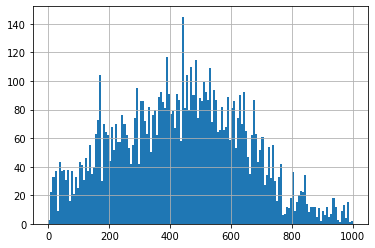

In [ ]:
# построим гистограмму для столбца parks_nearest
df['parks_nearest'].max()
df['parks_nearest'].hist(bins=150, range=(0,1000));

на этапе предобработки было выявлено, что в 65% данных не было информации о расстоянии до ближайшего парка, возможно это связано с отсутствием парка в радиусе несколько км и поэтому программа оставила пропуски. По тем данным, которые были в наличии можно сделать вывод, что часть недвижимости расположена на расстоянии 100-200м и далее к парку.

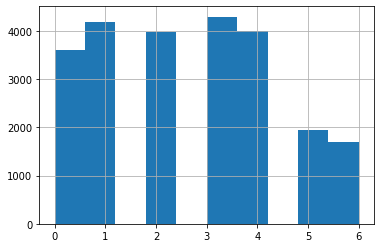

In [ ]:
# построим гистограмму для столбца weekday
df['weekday'].hist();

по данным из столбца weekday видим, что объявления размещаются в основном с Пн по Пт

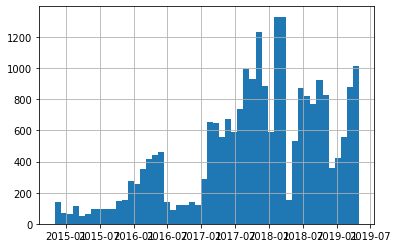

In [ ]:
# построим гистограмму для столбца weekday
df['month'].hist(bins=50);

по данным из столбца month видим, что существует некая сезонность в публикации объявлений (с февраля по апрель и с сентября по декабрь)

## 2.2. Исследование количества дней продажи объекта недвижимости

In [ ]:
# Изучим как быстро продавались квартиры с помощью числового описания данных
df['days_exposition'].describe()

count     23698.000000
mean     134387.217191
std      340845.297208
min           1.000000
25%          45.000000
50%         124.000000
75%         390.000000
max      999999.000000
Name: days_exposition, dtype: float64

Обратим внимание, что среднее в два раза больше медианы.

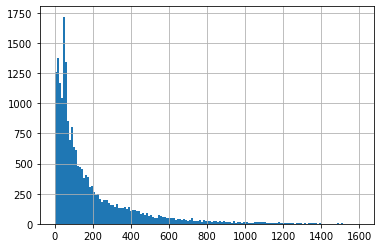

In [ ]:
# Изучим как быстро продавались квартиры с помощью гистограммы
df['days_exposition'].hist(bins=150, range=(0,1600));

В распределении есть длинный хвост с высокими значениями. Это влияет на среднее, но не на медиану. Можно сделать вывод, что обычно продажа занимает до 95 дней. Продажи до 45 дней можно считать быстрыми, а свыше 230 дней — необычно долгими.

## 2.3. Исследование факторов, влияющих на полную стоимость квартиры

In [ ]:
# проверим зависимость между общей площадью и общей стоимости объекта недвижимости
df['total_area'].corr(df['last_price'])

0.6537294473872792

Корреляция в 0.65 говорит о наличии связи

In [ ]:
# проверим зависимость между жилой площадью и общей стоимости объекта недвижимости
df['living_area'].corr(df['last_price'])

0.5407071606708928

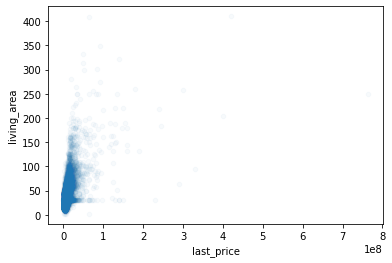

In [ ]:
# построим график корреляции
df.plot(x='last_price', y='living_area', kind='scatter', alpha=0.03);

Корреляция в 0.54 говорит о наличии связи

In [ ]:
# проверим зависимость между площадью кухни и общей стоимости объекта недвижимости
df['kitchen_area'].corr(df['last_price'])

0.4403179888603011

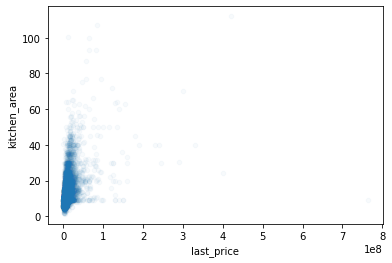

In [ ]:
# построим график корреляции
df.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.03);

Корреляция в 0.44 говорит о наличии связи, однако еще более слабой чем связь с жилой или общей площадью

In [ ]:
# проверим зависимость между числом комнат и общей стоимости объекта недвижимости
df['rooms'].corr(df['last_price'])

0.363387585291397

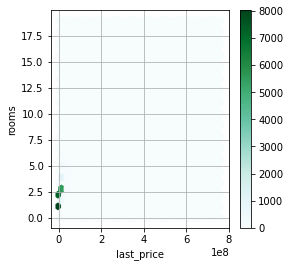

In [ ]:
# построим график корреляции
df.plot(x='last_price', y='rooms', kind='hexbin', gridsize=30, figsize=(4, 4), sharex=False, grid=True);

Корреляция 0,36 говорит о наличии связи, однако не слишком сильной.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,year,last_price,total_area
year,1.000000,-0.681204,-0.817431
last_price,-0.681204,1.000000,0.978196
total_area,-0.817431,0.978196,1.000000


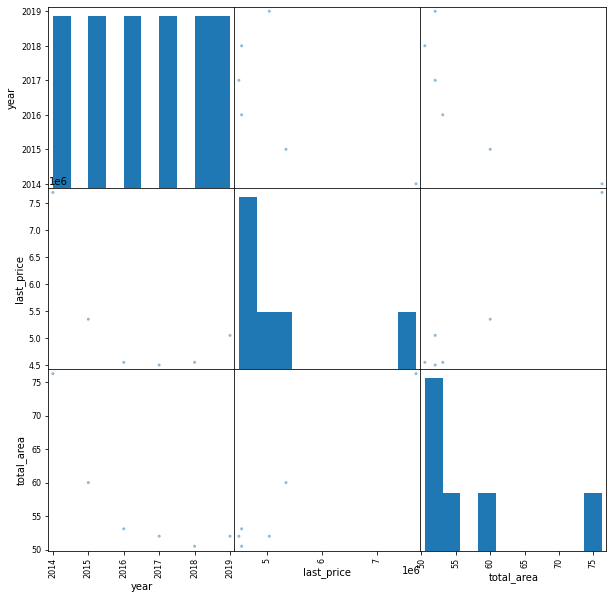

In [ ]:
# проверим Динамика цен зависит от года размещения объявления
year_corr = df.groupby('year')['last_price','total_area'].agg('median').reset_index()
pd.plotting.scatter_matrix(year_corr, figsize=(10, 10));
year_corr.corr()

зависимости от года размещения объявления нет

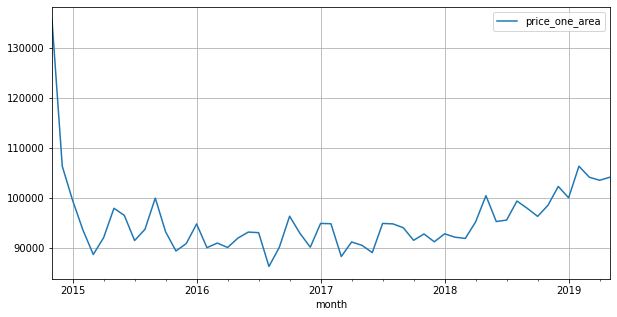

In [ ]:
# проверим Динамика цен зависит от месяца размещения объявления
month_pivot = df.pivot_table(index='month',values='price_one_area',aggfunc='median').plot(grid=True, figsize=(10, 5))

Пик стоимости приходится на апрель, далее спад (предполагаю влияет сезон отпусков)

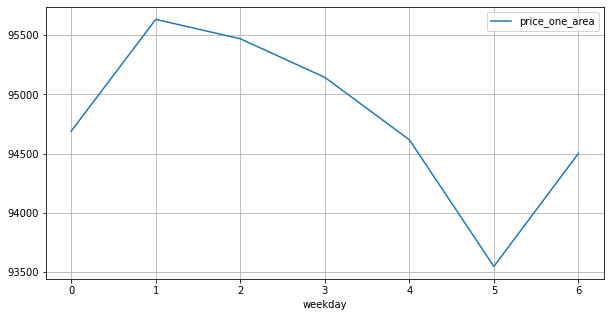

In [ ]:
# проверим Динамика цен зависит от дня недели размещения объявления
weekday_pivot = df.pivot_table(index='weekday',values='price_one_area',aggfunc='median').plot(grid=True, figsize=(10, 5))

Пик стоимости приходится на вторник, далее наблюдается спад

In [ ]:
# посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
big_locality_pivot = df.pivot_table(index='locality_name',values='price_one_area',aggfunc='count')
big_locality_pivot.columns=['count_ads']
price_one_area_pivot = df.pivot_table(index='locality_name',values='price_one_area',aggfunc='median')
general_pivot = big_locality_pivot.merge(price_one_area_pivot,on='locality_name', how='outer')
general_pivot.sort_values(by='count_ads',ascending=False).head(10)

,count_ads,price_one_area
locality_name,,
Санкт-Петербург,15720,104761.904762
Мурино,590,86175.643522
Кудрово,472,95675.473579
поселок Шушары,440,76876.172608
Всеволожск,398,65789.473684
Пушкин,369,100000.000000
Колпино,338,74723.748474
поселок Парголово,327,91642.857143
Гатчина,307,67796.610169


самой "популярной" локацией с наибольшим количеством объявлений является Санкт-Петербург с ценой за 1кв.м. 115 тыс.

In [ ]:
# выделим населённые пункты с самой низкой стоимостью квадратного метра
general_pivot.sort_values(by='price_one_area').head(10)

,count_ads,price_one_area
locality_name,,
деревня Старополье,3,11000.000000
поселок станции Свирь,2,11481.481481
деревня Вахнова Кара,1,11688.311688
деревня Выскатка,2,12335.480902
поселок Совхозный,2,12629.129129
деревня Малая Романовка,1,12724.550898
поселок Тесово-4,1,12931.034483
деревня Сижно,1,13709.677419
деревня Ям-Тесово,2,13711.553373


самая низкая стоимость зафиксирована в деревне Старополье, которая составляет 11 тыс за 1кв.м.

In [ ]:
# выделим населённые пункты с самой высокой стоимостью квадратного метра
general_pivot.sort_values(by='price_one_area',ascending=False).head(10)

,count_ads,price_one_area
locality_name,,
Санкт-Петербург,15720,104761.904762
Зеленогорск,24,101666.666667
Пушкин,369,100000.000000
Сестрорецк,183,99678.456592
поселок Левашово,1,96997.690531
Кудрово,472,95675.473579
поселок Парголово,327,91642.857143
деревня Мистолово,11,90888.888889
Без названия,49,89772.727273


самая высокая стоимость зафиксирована в Зеленогорске, которая составляет 115 тыс за 1кв.м.

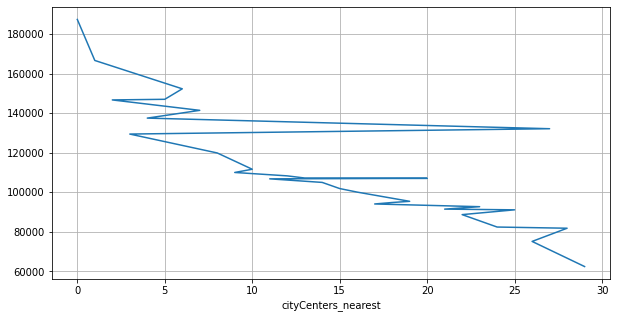

In [ ]:
# рассмотрим как стоимость объектов зависит от расстояния до центра города
spb = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest<999')
spb.groupby('cityCenters_nearest')['price_one_area'].mean().sort_values(ascending=False).plot(grid=True, figsize=(10, 5));

Чем ближе к центру города расположена недвижимость, тем цена за кв.м. выше

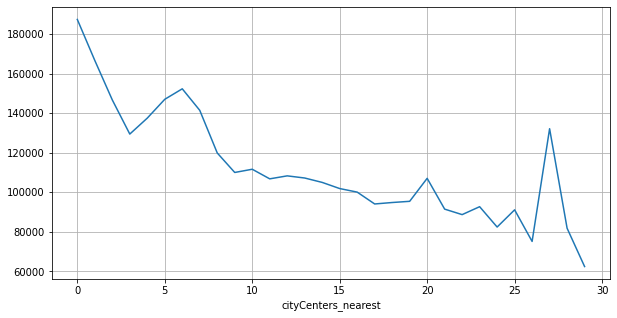

In [ ]:
# рассмотрим как стоимость объектов зависит от расстояния до центра города
spb = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest<999')
spb.groupby('cityCenters_nearest')['price_one_area'].mean().plot(grid=True, figsize=(10, 5));

# 3. Вывод

Исходя из полученных данных и проведенной обработки информации можно сделать следующий вывод:
- в объявлениях преобладает недвижимость с общей площадью до 60кв.м, жилой площадью - до 30кв.м и плащадью кухни до 10кв.м.
- в основном стоимость недвижимости до 4,5 млн.
- 70% продаваемых объектов однокомнатные и двухкомнатные 
- 80% продаваемых объектов находятся до 10 этажа, 
- большая часть объектов находится не на первом и не на последнем этажах, в основном это 5й и 9й этажи
- половина продаваемых объектов имеет среднюю высоту потолка 2,65м
- большая часть объектов находится в районе центра с отдаленностью от аэропорта около 20км
- в публикации объявлений наблюдается сезонность (спад приходится на теплый сезон, возможно это связано с периодом отпусков)
- обычно продажа недвижимости занимает до 95 дней, продажи до 45 дней можно считать быстрыми, а свыше 230 дней - долгими
- наибольшая зависимость стоимости объекта наблюдается с общей площадью данной недвижимости, также важно, что объекты на первом этаже самые дешевые
- самое большое количество объявлений размещено по Санкт-Петербургу со стоимостью 115 тыс/кв.м.
- самая низкая стоимость зафиксирована в деревне Старополье с ценой 11 тыс/кв.м.
- самая высокая стоимость зафиксирована в городе Зеленогорск с ценой 115 тыс/кв.м.
- стоимость объектов зависит от расстояния от центра, чем ближе объект недвижимости находится к центру, тем дороже его стоимость

**Краткое описание шагов исследования**

    
Шаг 1. Загрузка данных и подготовка их к анализу

- Открыт и изучен файл с данными 

- Предобработка данных:
- найдены и изучены пропущенные значения в столбцах:
- исправлены типы данных в столбцах
- найдены уникальные значения в столбце с названиями и устранены неявные дубликаты
- найдены и устранены редкие и выбивающиеся значения. Например, в столбце ceiling_height была указана высота потолков 25 м и 32 м. 
- Добавлены в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра;
- день недели публикации объявления;
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры;
- расстояние до центра города в километрах.
    
Шаг 2. Проведен исследовательский анализ данных. 

- Были изучены следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры;
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.
- построены отдельные гистограммы для каждого из этих параметров. 

- Изучены зависимость цены от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).
- построены графики, которые покажут зависимость цены от указанных выше параметров. 
- посчитана средняя цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
    
    
Шаг 3. Вывод